## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# 데이터프레임 생성 및 전처리

## 데이터프레임 생성 및 데이터 정보 확인

In [2]:
data = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## 데이터 전처리

### 날짜 데이터 전처리

In [5]:
# 컬럼 이름 변경
data = data.rename(columns = {'Month':'month', '#Passengers':'passengers'})

# object 타입인 날짜 데이터를 datetime64 타입으로 변환 
data.month = pd.to_datetime(data.month)

# 날짜 데이터를 Index 컬럼으로 설정
data = data.set_index('month')

data

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq=None)

## 그래프 개형 확인

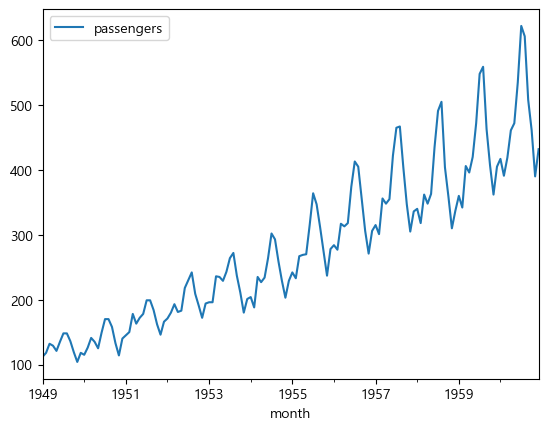

In [7]:
fig = data.plot()

## 시계열 분해

- `statsmodels.tsa.seasonal.seasonal_decompose( x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0 )`
  - model = 'additive' : Trend, Seasonal, Resid 가 더해져서 해당 값을 구성한다고 가정
  - model = 'multiplicative' : Trend, Seasonal, Resid 가 곱해져서 해당 값을 구성한다고 가정
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

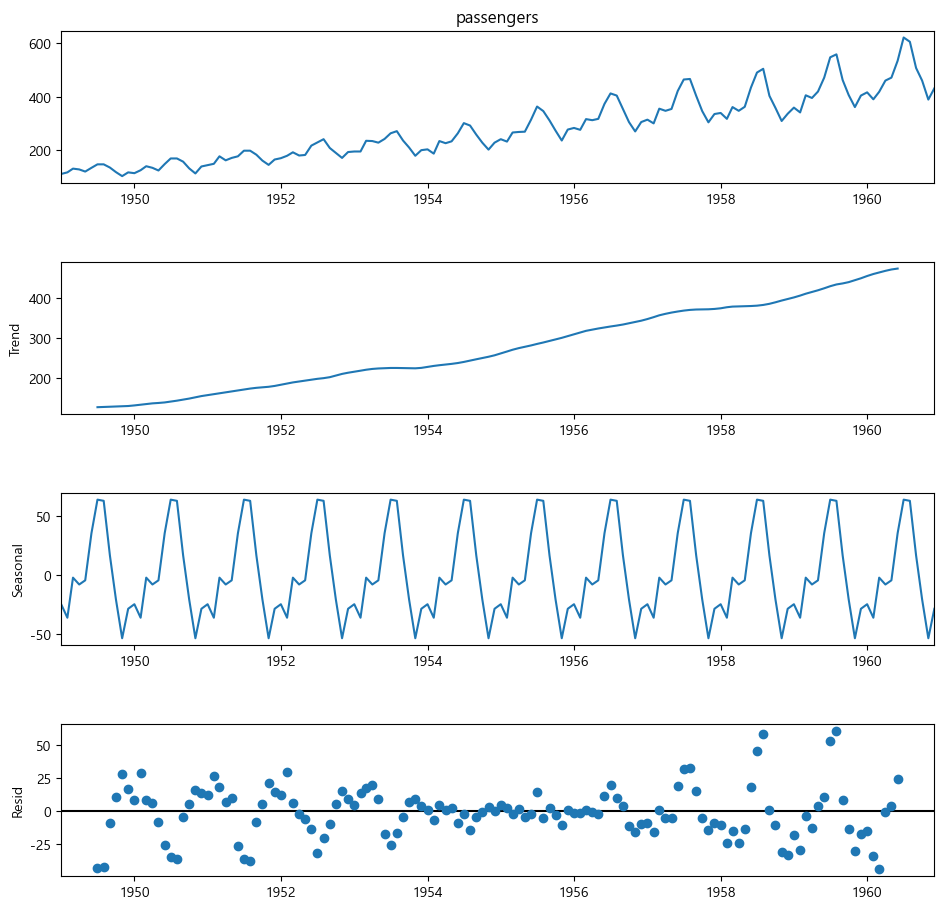

In [8]:
decomposition = seasonal_decompose( data.passengers, period=12 )

fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

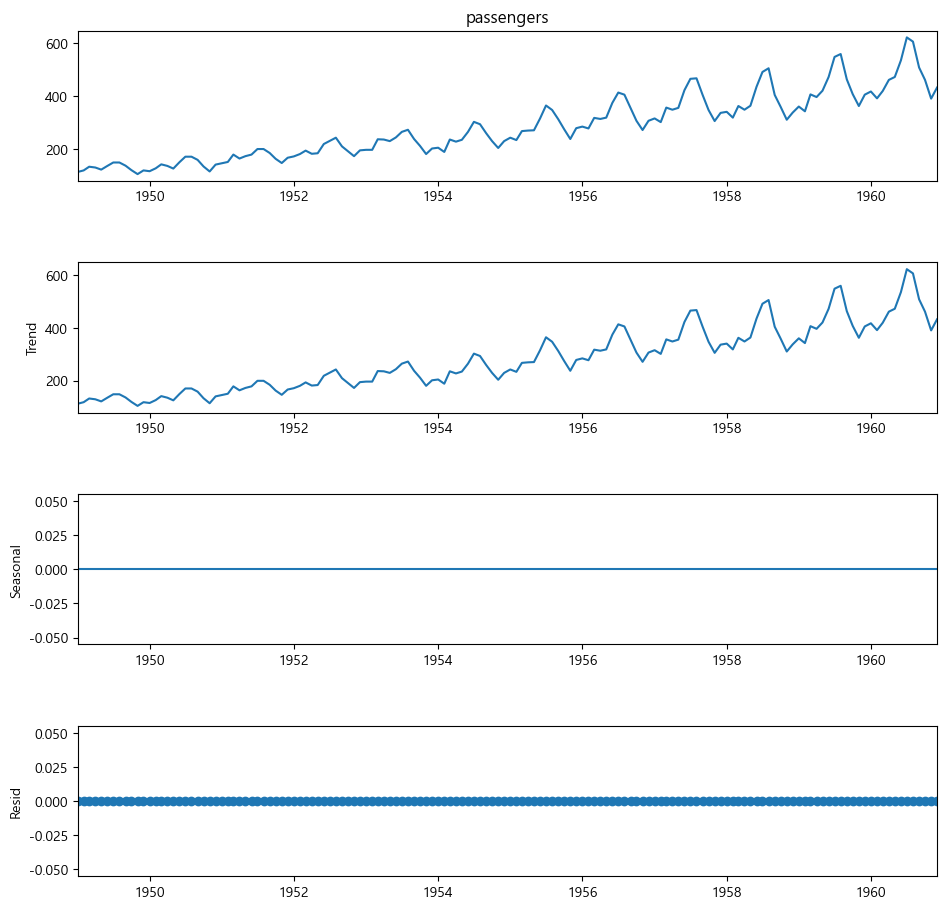

In [9]:
decomposition = seasonal_decompose( data.passengers, period = 1 )

fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

# Data Set 분리
- 시계열 데이터의 경우 순서가 뒤섞이면 안되기 때문에 `suffle = False` 옵션 적용

In [10]:
train_data, test_data = train_test_split( data,
                                          test_size = 0.2,
                                          shuffle = False )  # 시계열 데이터이므로 순서가 뒤섞이면 안됨.

# ACF 및 PACF 확인

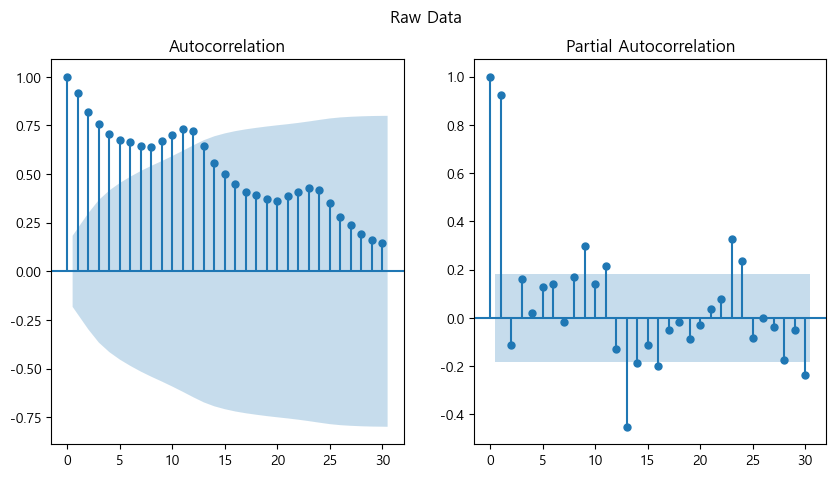

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Raw Data')

plot_acf( train_data.values.squeeze(), lags = 30, ax=ax[0])
plot_pacf( train_data.values.squeeze(), lags = 30, ax=ax[1]);

# 차분(Differencing)

- `pandas.Series.diff(periods=1)`  
https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html

- `pandas.DataFrame.diff( periods=1, axis=0 )`  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

## 1차 차분

In [12]:
diff_train = train_data.copy()

# 1차 차분
diff_train = diff_train.diff(periods = 1)
diff_train

,passengers
month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1958-03-01,44.0
1958-04-01,-14.0
1958-05-01,15.0


In [13]:
# 결측치 확인
diff_train.isnull().groupby( diff_train.isnull()['passengers'] == True ).count()

,passengers
passengers,
False,114
True,1


In [14]:
# 결측치 제거
diff_train = diff_train.dropna()

print('< RAW DATA >' )
print(train_data)
print()
print('< Differenced DATA >' )
print(diff_train)

< RAW DATA >
            passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491

[115 rows x 1 columns]

< Differenced DATA >
            passengers
month                 
1949-02-01         6.0
1949-03-01        14.0
1949-04-01        -3.0
1949-05-01        -8.0
1949-06-01        14.0
...                ...
1958-03-01        44.0
1958-04-01       -14.0
1958-05-01        15.0
1958-06-01        72.0
1958-07-01        56.0

[114 rows x 1 columns]


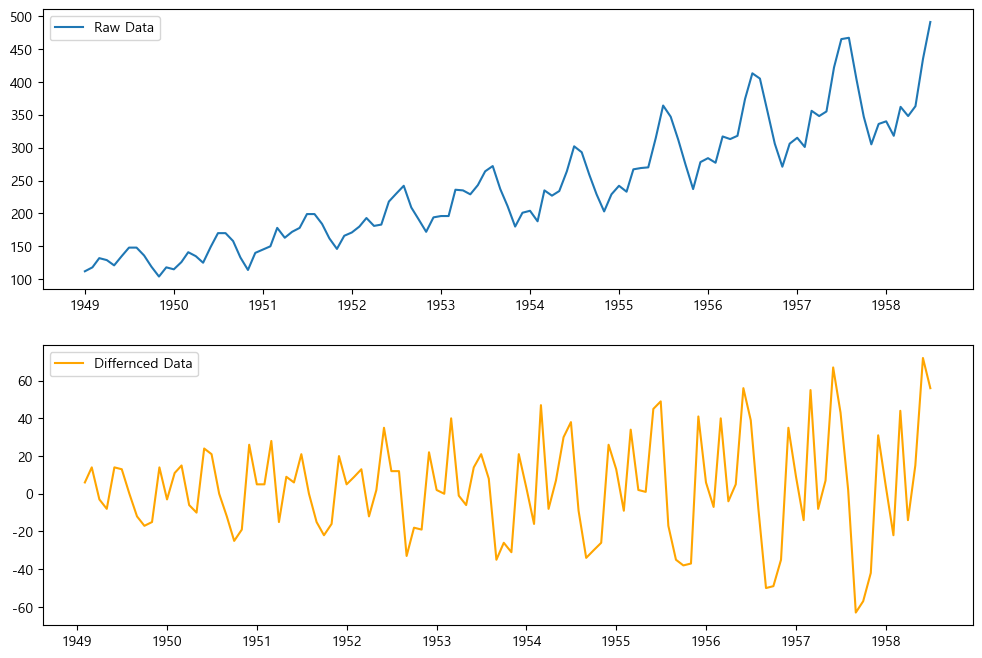

In [15]:
plt.figure( figsize=(12,8) )

plt.subplot(211)
plt.plot(train_data)
plt.legend(['Raw Data'])

plt.subplot(212)
plt.plot(diff_train, 'orange')
plt.legend(['Differnced Data'])

plt.show()

## 차분 후 ACF 및 PACF 확인

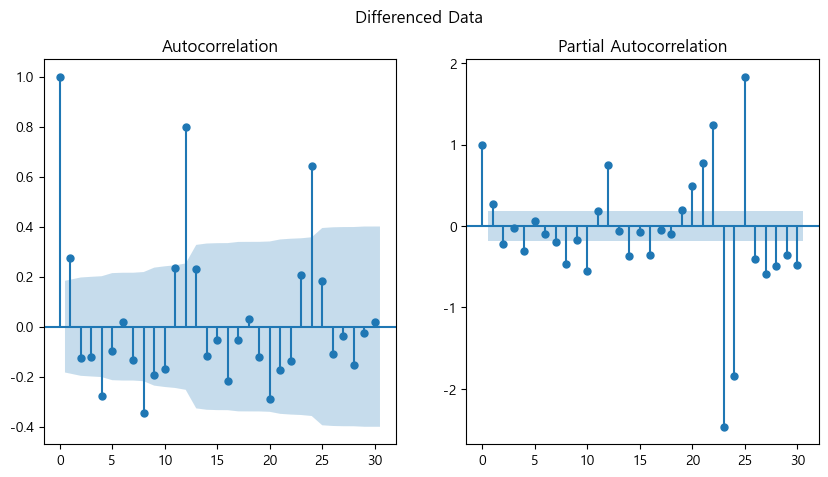

In [16]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Differenced Data')

plot_acf( diff_train.values.squeeze(), lags = 30, ax=ax[0])
plot_pacf( diff_train.values.squeeze(), lags = 30, ax=ax[1]);

# 시계열 분석 - ARIMA

- 모델 생성  
`statsmodels.tsa.arima.model.ARIMA( endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True )`  
  - trend = {‘n’,’c’,’t’,’ct’}  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html


- 예측 (Out-of-sample forecasts)  
`ARIMAResults.forecast(steps=1, **kwargs)`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.forecast.html

- forecasts and prediction intervals  
`ARIMAResults.get_forecast( steps=1, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_forecast.html

- 예측 (In-sample prediction and out-of-sample forecasting)  
`ARIMAResults.predict( start=None, end=None, exog=None, typ='linear', dynamic=False )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.predict.html

- prediction and prediction intervals  
`ARIMAResults.get_prediction( start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_prediction.html

## 최적 파라미터 탐색 : ARIMA

In [17]:
# 최적 파라미터 탐색 : ARIMA

p = range(0,3)
d = range(0,2)
q = range(0,3)

pdq = list(itertools.product(p, d, q))

aic = []

for i in pdq:
    model = ARIMA( train_data, order = (i), trend = 't' )
    fit_model = model.fit()
    print( f'ARIMA: {i} >> AIC : {round(fit_model.aic, 2)}' )   
    aic.append( round(fit_model.aic, 2) )    
print()


# AIC 작은 순서대로 정렬하여 상위 3개 추출
aic_copy = aic.copy()
aic_copy.sort()

optimal_1 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[0] ]
optimal_2 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[1] ]
optimal_3 = [ (pdq[i], j) for i, j in enumerate(aic) if j == aic_copy[2] ]

print( '< 1st optimal >',
      '\npdq =', optimal_1[0][0],
      '\nminimum AIC =', optimal_1[0][1] )
print()
print( '< 2nd optimal >',
      '\npdq =', optimal_2[0][0],
      '\nminimum AIC =', optimal_2[0][1] )
print()
print( '< 3rd optimal >',
      '\npdq =', optimal_3[0][0],
      '\nminimum AIC =', optimal_3[0][1] )

ARIMA: (0, 0, 0) >> AIC : 1268.72
ARIMA: (0, 0, 1) >> AIC : 1144.54
ARIMA: (0, 0, 2) >> AIC : 1114.87
ARIMA: (0, 1, 0) >> AIC : 1076.52
ARIMA: (0, 1, 1) >> AIC : 1064.62
ARIMA: (0, 1, 2) >> AIC : 1061.08
ARIMA: (1, 0, 0) >> AIC : 1084.6
ARIMA: (1, 0, 1) >> AIC : 1067.88
ARIMA: (1, 0, 2) >> AIC : 1067.83
ARIMA: (1, 1, 0) >> AIC : 1069.44
ARIMA: (1, 1, 1) >> AIC : 1058.83
ARIMA: (1, 1, 2) >> AIC : 1046.05
ARIMA: (2, 0, 0) >> AIC : 1072.27
ARIMA: (2, 0, 1) >> AIC : 1064.99
ARIMA: (2, 0, 2) >> AIC : 1065.03
ARIMA: (2, 1, 0) >> AIC : 1066.2
ARIMA: (2, 1, 1) >> AIC : 1045.66
ARIMA: (2, 1, 2) >> AIC : 1047.19

< 1st optimal > 
pdq = (2, 1, 1) 
minimum AIC = 1045.66

< 2nd optimal > 
pdq = (1, 1, 2) 
minimum AIC = 1046.05

< 3rd optimal > 
pdq = (2, 1, 2) 
minimum AIC = 1047.19


## 모델 생성 및 적합

In [18]:
model = ARIMA( train_data,
               order = (2, 1, 1),
               trend = 't' )
fit_model = model.fit()

print( fit_model.summary() )

                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -517.829
Date:                Fri, 10 Sep 2021   AIC                           1045.658
Time:                        03:33:22   BIC                           1059.339
Sample:                    01-01-1949   HQIC                          1051.210
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5599      0.210     12.162      0.000       2.147       2.972
ar.L1          1.0890      0.082     13.358      0.000       0.929       1.249
ar.L2         -0.4730      0.087     -5.425      0.0

### 잔차분석

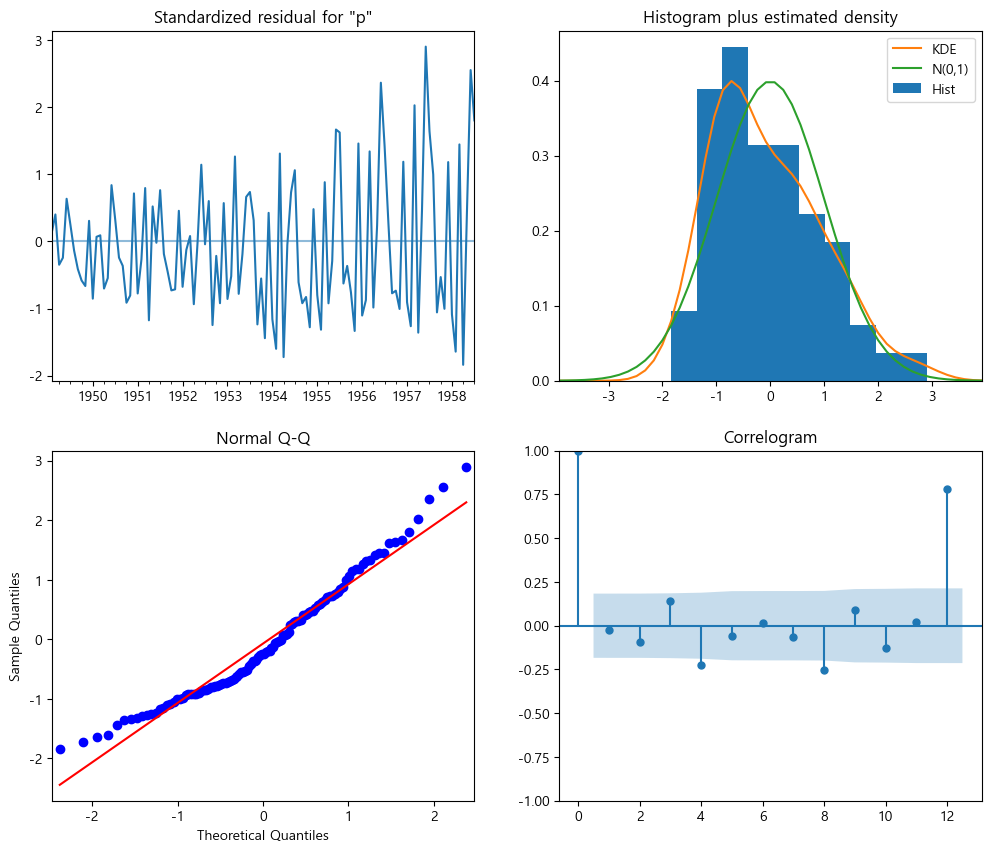

In [19]:
fit_model.plot_diagnostics( figsize =(12,10), lags = 12);

## 예측 및 평가

In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 1958-08-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


            predicted_mean  lower passengers  upper passengers
1958-08-01      478.819515        434.892984        522.746045
1958-09-01      440.049281        374.827718        505.270843
1958-10-01      404.572694        331.882940        477.262449
1958-11-01      385.260146        311.505724        459.014568
1958-12-01      381.992428        308.237855        455.747000
1959-01-01      388.551890        314.491641        462.612140
1959-02-01      398.223855        323.886763        472.560947
1959-03-01      406.636997        332.225440        481.048554
1959-04-01      412.207026        337.800929        486.613124
1959-05-01      415.276321        340.857879        489.694762
1959-06-01      416.967117        342.518121        491.416114
1959-07-01      418.339594        343.866180        492.813008
1959-08-01      420.017462        345.533294        494.501630
1959-09-01      422.178471        347.692576        496.664366
1959-10-01      424.721172        350.237219        499

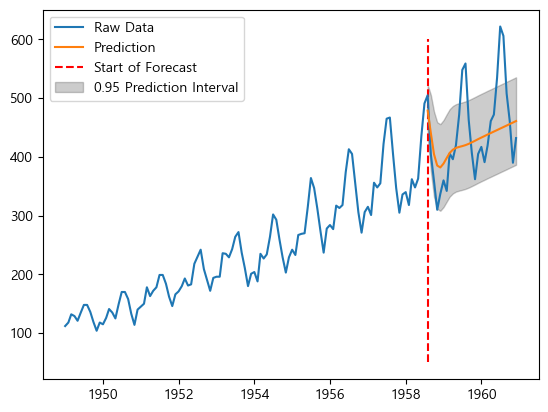

In [21]:
# 학습 데이터 이후를 예측한 값
forecast = fit_model.forecast(29)

# 예측값의 신뢰구간
forecast_interval = fit_model.get_forecast( steps = 29 ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
forecast_result = pd.concat( [forecast, forecast_interval], axis = 1)
print(forecast_result)
print()

# R-squared 산출
r2 = r2_score(test_data, forecast)
print( 'R-squared = ', r2.round(4))
print()

# 그래프 출력

pred_value = forecast_result.iloc[:,0]
pred_lower = forecast_result.iloc[:,1]
pred_upper = forecast_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )

plt.vlines( test_data.index[0], 50, 600,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.plot( forecast, label = 'Prediction' )

plt.fill_between( forecast.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )
plt.legend()
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


            predicted_mean  lower passengers  upper passengers
1949-02-01      114.582532         61.350979        167.814085
1949-03-01      121.506904         70.420060        172.593749
1949-04-01      137.699677         88.467568        186.931786
1949-05-01      126.960143         78.833668        175.086619
1949-06-01      119.612699         72.220854        167.004544
...                    ...               ...               ...
1960-08-01      450.772380        376.293053        525.251706
1960-09-01      453.337716        378.858468        527.816963
1960-10-01      455.902362        381.423164        530.381559
1960-11-01      458.464845        383.985664        532.944026
1960-12-01      461.025298        386.546111        535.504485

[143 rows x 3 columns]

R-squared =  0.9042



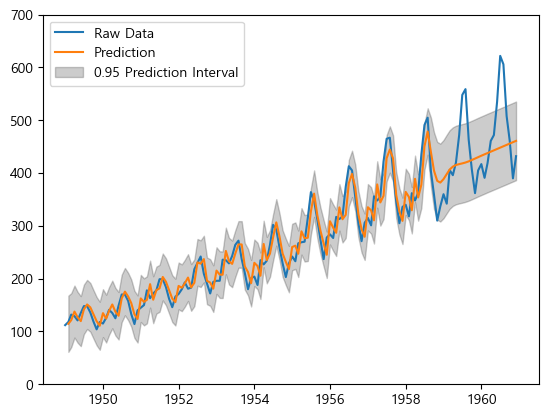

In [23]:
# 예측 구간 설정
start_index = data.index[1]
end_index = data.index[143]

# 전체 데이터에 적합모델을 적용하여 예측한 값
prediction = fit_model.predict( start = start_index, end = end_index )

# 예측값의 신뢰구간
prediction_interval = fit_model.get_prediction( start = start_index, end = end_index ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
pred_result = pd.concat( [prediction, prediction_interval], axis = 1)
print(pred_result)
print()

# R-squared 산출
r2 = r2_score(data[1:], prediction)
print( 'R-squared = ', r2.round(4))
print()

# 그래프 출력
pred_value = pred_result.iloc[:,0]
pred_lower = pred_result.iloc[:,1]
pred_upper = pred_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )

plt.plot( prediction, label = 'Prediction' )

plt.fill_between( prediction.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.ylim( 0, 700 )
plt.legend()
plt.show()

# 시계열 분석 - SARIMA

- 모델 생성  
`statsmodels.tsa.statespace.sarimax.SARIMAX( endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html


- 예측 (Out-of-sample forecasts)  
`MLEResults.forecast( steps=1, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.forecast.html

- forecasts and prediction intervals  
`MLEResults.get_forecast( steps=1, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.get_forecast.html

- 예측 (In-sample prediction and out-of-sample forecasting)  
`MLEResults.predict( start=None, end=None, dynamic=False, **kwargs )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.predict.html

- prediction and prediction intervals  
`MLEResults.get_prediction( start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs )`  
Method : `.conf_int( alpha = 0.05 )`  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.mlemodel.MLEResults.get_prediction.html

## 최적 파라미터 탐색 : SARIMA

In [24]:
# 최적 파라미터 탐색 : SARIMA

p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [ ( x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q)) ] # 12개월 단위의 계절변동을 보이므로 12 입력

aic = []
params = []

for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX( train_data, order = (i), seasonal_order = (j) )
            fit_model = model.fit()
            print( f'SARIMA: {i}{j} >> AIC : {round(fit_model.aic, 2)}' )
            aic.append( round(fit_model.aic, 2) )
            params.append( (i, j) )
        except:
            continue
print()


# AIC 작은 순서대로 정렬하여 상위 3개 추출
aic_copy = aic.copy()
aic_copy.sort()

optimal_1 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[0] ]
optimal_2 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[1] ]
optimal_3 = [ (params[i], j) for i, j in enumerate(aic) if j == aic_copy[2] ]

print( '< 1st optimal >',
      '\npdq =', optimal_1[0][0][0],
      '\nseasonal_pdq =', optimal_1[0][0][1],
      '\nminimum AIC =', optimal_1[0][1] )
print()
print( '< 2nd optimal >',
      '\npdq =', optimal_2[0][0][0],
      '\nseasonal_pdq =', optimal_2[0][0][1],
      '\nminimum AIC =', optimal_2[0][1] )
print()
print( '< 3rd optimal >',
      '\npdq =', optimal_3[0][0][0],
      '\nseasonal_pdq =', optimal_3[0][0][1],
      '\nminimum AIC =', optimal_3[0][1] )

SARIMA: (0, 1, 0)(0, 1, 0, 12) >> AIC : 757.83
SARIMA: (0, 1, 0)(0, 1, 1, 12) >> AIC : 756.99
SARIMA: (0, 1, 0)(0, 1, 2, 12) >> AIC : 758.83
SARIMA: (0, 1, 0)(1, 1, 0, 12) >> AIC : 756.96
SARIMA: (0, 1, 0)(1, 1, 1, 12) >> AIC : 758.92
SARIMA: (0, 1, 0)(1, 1, 2, 12) >> AIC : 754.42
SARIMA: (0, 1, 0)(2, 1, 0, 12) >> AIC : 758.87
SARIMA: (0, 1, 0)(2, 1, 1, 12) >> AIC : 760.73
SARIMA: (0, 1, 0)(2, 1, 2, 12) >> AIC : 754.91
SARIMA: (0, 1, 1)(0, 1, 0, 12) >> AIC : 756.01
SARIMA: (0, 1, 1)(0, 1, 1, 12) >> AIC : 756.38
SARIMA: (0, 1, 1)(0, 1, 2, 12) >> AIC : 757.65
SARIMA: (0, 1, 1)(1, 1, 0, 12) >> AIC : 756.17
SARIMA: (0, 1, 1)(1, 1, 1, 12) >> AIC : 758.11
SARIMA: (0, 1, 1)(1, 1, 2, 12) >> AIC : 751.73
SARIMA: (0, 1, 1)(2, 1, 0, 12) >> AIC : 757.99
SARIMA: (0, 1, 1)(2, 1, 1, 12) >> AIC : 753.78
SARIMA: (0, 1, 2)(0, 1, 0, 12) >> AIC : 757.78
SARIMA: (0, 1, 2)(0, 1, 1, 12) >> AIC : 758.04
SARIMA: (0, 1, 2)(0, 1, 2, 12) >> AIC : 759.28
SARIMA: (0, 1, 2)(1, 1, 0, 12) >> AIC : 757.81
SARIMA: (0, 1

## 모델 생성 및 적합

In [25]:
model = SARIMAX( train_data,
                 order = (1, 1, 0), seasonal_order = (1, 1, 2, 12) )
fit_model = model.fit()

print( fit_model.summary() )

                                        SARIMAX Results                                        
Dep. Variable:                              passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -370.574
Date:                                 Fri, 10 Sep 2021   AIC                            751.147
Time:                                         03:36:06   BIC                            764.272
Sample:                                     01-01-1949   HQIC                           756.462
                                          - 07-01-1958                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2366      0.093     -2.531      0.011      -0.420      -0

### 잔차분석

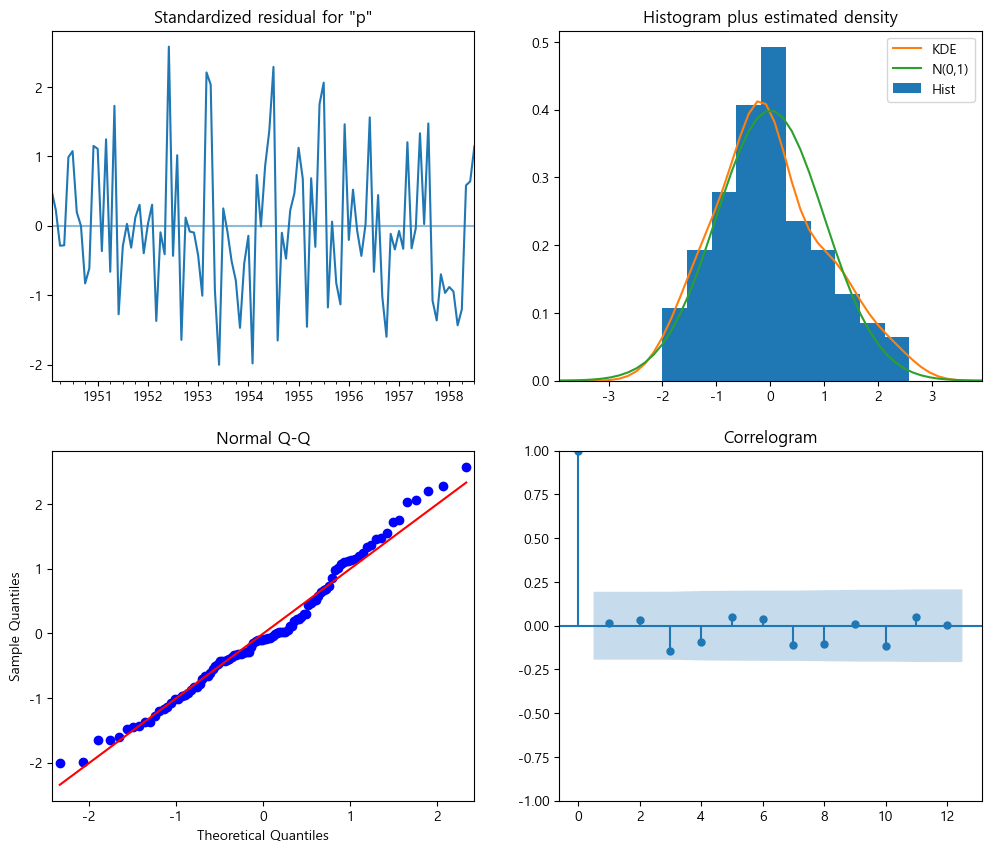

In [26]:
fit_model.plot_diagnostics( figsize =(12,10), lags = 12);

## 예측 및 평가

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 1958-08-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


            predicted_mean  lower passengers  upper passengers
1958-08-01      485.653993        468.629929        502.678056
1958-09-01      422.682725        401.264983        444.100466
1958-10-01      364.960857        339.401138        390.520576
1958-11-01      321.746685        292.735672        350.757698
1958-12-01      357.198903        325.082874        389.314931
1959-01-01      363.875357        328.935707        398.815007
1959-02-01      341.704882        304.179022        379.230742
1959-03-01      392.814200        352.869466        432.758935
1959-04-01      381.090987        338.865662        423.316312
1959-05-01      395.446163        351.057276        439.835050
1959-06-01      471.454584        425.002795        517.906373
1959-07-01      527.852352        479.425456        576.279249
1959-08-01      522.778711        467.977322        577.580100
1959-09-01      454.658062        395.293237        514.022887
1959-10-01      393.159294        329.314697        457

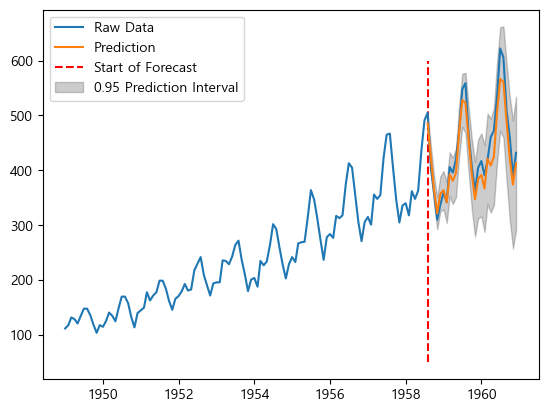

In [28]:
# 학습 데이터 이후를 예측한 값
forecast = fit_model.forecast(29)

# 예측값의 신뢰구간
forecast_interval = fit_model.get_forecast( steps = 29 ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
forecast_result = pd.concat( [forecast, forecast_interval], axis = 1)
print(forecast_result)
print()

# R-squared 산출
r2 = r2_score(test_data, forecast)
print( 'R-squared = ', r2.round(4))
print()

# 그래프 출력

pred_value = forecast_result.iloc[:,0]
pred_lower = forecast_result.iloc[:,1]
pred_upper = forecast_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )

plt.vlines( test_data.index[0], 50, 600,
            linestyle = '--', color = 'r',
            label = 'Start of Forecast' )

plt.plot( forecast, label = 'Prediction' )

plt.fill_between( forecast.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )
plt.legend()
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


            predicted_mean  lower passengers  upper passengers
1949-02-01      111.998697      -1848.061669       2072.059063
1949-03-01      118.000169      -1842.060197       2078.060534
1949-04-01      131.999634      -1828.060731       2092.060000
1949-05-01      129.000156      -1831.060209       2089.060522
1949-06-01      121.000149      -1839.060217       2081.060515
...                    ...               ...               ...
1960-08-01      560.979008        459.830906        662.127111
1960-09-01      487.898362        381.456770        594.339955
1960-10-01      422.583360        310.879183        534.287536
1960-11-01      374.011420        257.330309        490.692531
1960-12-01      412.973830        291.515116        534.432544

[143 rows x 3 columns]

R-squared =  0.9837



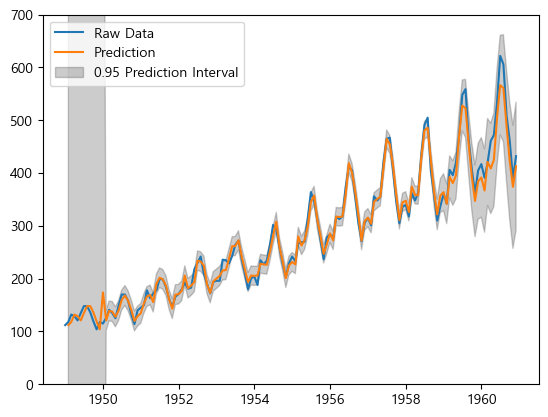

In [30]:
# 예측 구간 설정
start_index = data.index[1]
end_index = data.index[143]

# 전체 데이터에 적합모델을 적용하여 예측한 값
prediction = fit_model.predict( start = start_index, end = end_index )

# 예측값의 신뢰구간
prediction_interval = fit_model.get_prediction( start = start_index, end = end_index ).conf_int(alpha = 0.05)

# 예측값과 신뢰구간에 대한 데이터프레임
pred_result = pd.concat( [prediction, prediction_interval], axis = 1)
print(pred_result)
print()

# R-squared 산출
r2 = r2_score(data[1:], prediction)
print( 'R-squared = ', r2.round(4))
print()

# 그래프 출력
pred_value = pred_result.iloc[:,0]
pred_lower = pred_result.iloc[:,1]
pred_upper = pred_result.iloc[:,2]

plt.plot( data, label = 'Raw Data' )

plt.plot( prediction, label = 'Prediction' )

plt.fill_between( prediction.index, pred_lower, pred_upper,
                  color = 'k', alpha = 0.2,
                  label = '0.95 Prediction Interval' )

plt.ylim( 0, 700 )
plt.legend()
plt.show()